# Week 4 -- Counting Words & Phrases

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls
import pickle

# comp-linguistics
import spacy

# nltk-import
import nltk

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [2]:
nlp = spacy.load("en")

## Loading the Corpora

In [3]:
# SKIP ALL CELLS BELOW IF YOU JUST WANT TO SKIP MASSIVE PROCESSING TIMES AND JUST LOAD THE PICKLED DF
with open('reddit_submissions_min_tkns_w4.pkl', 'rb') as f:
    reddit_submissions_min = pickle.load(f)

In [3]:
reddit_submissions_raw = pandas.read_csv('../project_data/reddit_submissions_2015_18.csv', index_col=6)
reddit_submissions_min = reddit_submissions_raw[['author', 'created_utc', 'subreddit', 'title', 'selftext', 'distinguished']]
len(reddit_submissions_min)

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


78905

In [4]:
reddit_submissions_min.head()

,author,created_utc,subreddit,title,selftext,distinguished
id,,,,,,
4dgf5j,avian_buddha,1459863156,altright,List of Alt Right Websites,Let's get a list going so that anybody can com...,moderator
4rj06j,AugustJRush,1467818739,altright,What type of content do you guys like to see?,"Would you folk like to see more news stories, ...",NaN
4s2m7h,LetThereBeWhite,1468103206,altright,"Damn, 250 subscribers to 450 in less than a we...",_____________\n\n-\n\n# For once in its cuck l...,moderator
4s39s6,AugustJRush,1468113131,altright,How do you describe your political leanings to...,"I usually just go with ""Far-Right"", which is g...",NaN
4s63m0,YukonAurelius,1468167550,altright,Any interest in alt-right reading group?,"I was thinking of digging into Spengler's ""Dec...",NaN


In [6]:
reddit_submissions_min['post_text'] = reddit_submissions_min['title'] + " " + reddit_submissions_min['selftext']
reddit_submissions_min['tokenized_text'] = reddit_submissions_min['post_text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
reddit_submissions_min['normalized_text'] = reddit_submissions_min['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [7]:
with open('reddit_submissions_min_tkns_w4.pkl', 'wb') as f:
    pickle.dump(reddit_submissions_min, f)

## Exercise 1

Tasks:
- Convert to an `nltk` object. 
- Tokenize the text.
- Count words.
- Check for Zipf's law.
- Make a Dispersion plot.

### Counting words

In [65]:
# SKIP NEXT TWO CELLS IF YOU JUST WANT TO LOAD THE PICKLED DF
with open('reddit_submissions_wlist_w4.pkl', 'rb') as f:
    reddit_submissions_subred = pickle.load(f)

In [93]:
def wordCounter(subred_name, wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'subreddit' : [], 'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['subreddit'].append(subred_name)
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    final_df = pandas.DataFrame(countsForFrame)
    return final_df

In [ ]:
reddit_submissions_subred = reddit_submissions_min.groupby(('subreddit'))['tokenized_text'].apply(sum)
reddit_submissions_subred

In [60]:
len(reddit_submissions_subred)

6

In [160]:
with open('reddit_submissions_wlist_w4.pkl', 'wb') as f:
    pickle.dump(reddit_submissions_subred, f)

In [105]:
for i in range(len(reddit_submissions_subred)):
    keyword = reddit_submissions_subred.index[i]
    if i == 0:
        submissions_subred_wcount = wordCounter(keyword, reddit_submissions_subred[keyword])
        submissions_subred_wcount.sort_values(by = ['count'], ascending = False, inplace = True)
    else:
        xx = wordCounter(keyword, reddit_submissions_subred[keyword])
        xx.sort_values(by = ['count'], ascending = False, inplace = True)
        submissions_subred_wcount = submissions_subred_wcount.append(xx)

,subreddit,word,count
1,Conservative,the,11037
29,Conservative,to,7269
7,Conservative,and,6072
12,Conservative,of,5424
36,Conservative,i,5406


### Zipf's Law

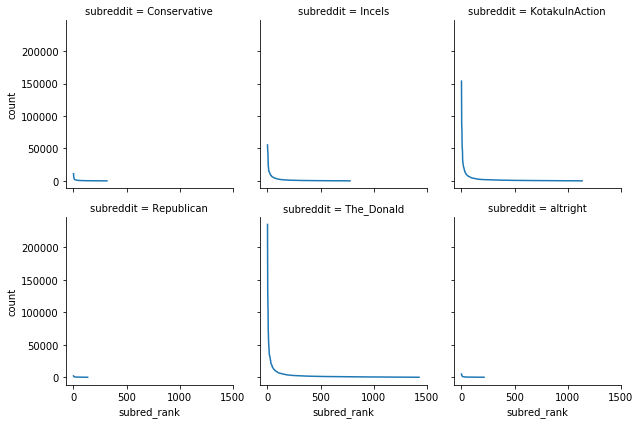

In [118]:
submissions_subred_wcount["subred_rank"] = submissions_subred_wcount.groupby("subreddit")["count"].rank("dense", ascending=False)

g_zipf = sns.FacetGrid(submissions_subred_wcount, col="subreddit", col_wrap = 3)
g_zipf = g_zipf.map(plt.plot, "subred_rank","count")

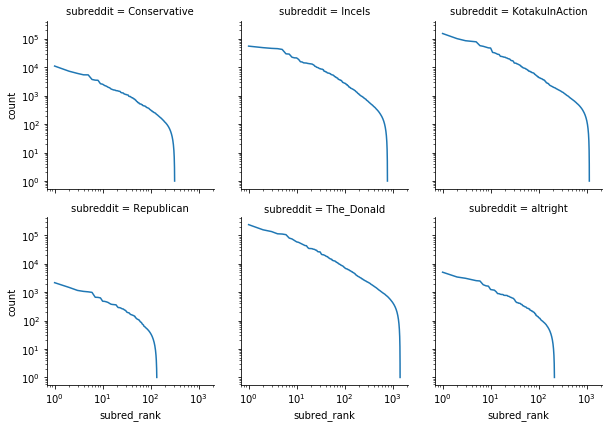

In [126]:
#ax.set(xscale="log", yscale="log")
g_zipf_log = sns.FacetGrid(submissions_subred_wcount, col="subreddit", col_wrap = 3)
g_zipf_log = g_zipf_log.map(plt.plot, "subred_rank","count")
g_zipf_log = g_zipf_log.set(xscale="log", yscale="log")

### Lexical Dispersion

In [66]:
nltk_dict = {}
for i in range(len(reddit_submissions_subred)):
    keyword = reddit_submissions_subred.index[i]
    nltk_dict[keyword] = nltk.Text(reddit_submissions_subred[keyword])

nltk_dict.keys()

dict_keys(['Conservative', 'Incels', 'KotakuInAction', 'Republican', 'The_Donald', 'altright'])

In [67]:
incels_text_concord = nltk.text.ConcordanceIndex(nltk_dict['Incels'])
incels_text_concord.print_concordance('cuck')

Displaying 25 of 25 matches:
y dad Oh god this man is the greatest cuck to ever exist I would n't surprised i
hen she told me this Just lmao at the cuck that will one day marry this used up 
him and another man making the Chad a cuck or beta buck Most modern music is abo
you beta provide to her she is gon na cuck u if she has the chance When a woman 
anned from r foreveralone The fucking cuck mods of that sub banned me for tellin
 to feed you your own raw organs nice cuck white knight patrol i hope you kill y
ved Homosexual men How much of a beta cuck must you be to get fucked by a Chad w
cked him in their engagement and will cuck him in their marriage She rode the co
ll having a stable safety net AKA the cuck If the younger Chad esque man they ar
 character is a socially awkward beta cuck or a muscular alpha chad Why are ther
ing the only thing that a blue pilled cuck like him would do accepts the widow A
erved it for being a blue pilled beta cuck The lesson to be learned from this is

In [68]:
nltk_dict['Incels'].count('cuck')

292

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


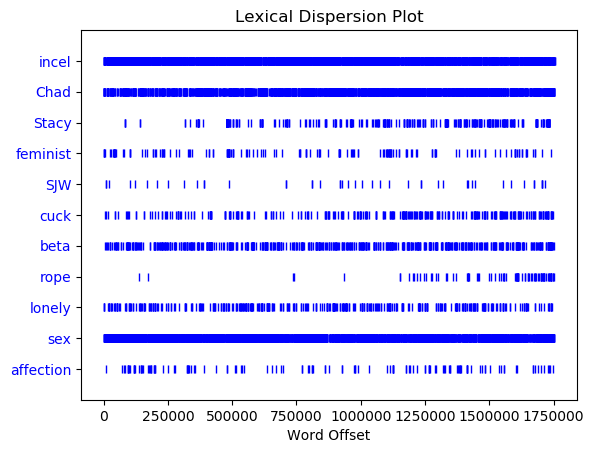

In [69]:
sns.reset_orig() #Seaborn messes with this plot, disabling it
nltk_dict['Incels'].dispersion_plot(['incel', 'Chad','Stacy', 'feminist', 'SJW' ,'cuck', 'beta', 'rope', 'lonely', 'sex', 'affection'])
sns.set() #Re-enabling seaborn

## Exercise 3 -- PoS Tagging

In [4]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

def sent_tokenize(word_list):
    doc = nlp(word_list)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents

In [ ]:
reddit_submissions_min_sample = reddit_submissions_min.sample(frac = 0.05)
reddit_submissions_min_sample['sentences'] = reddit_submissions_min_sample['post_text'].apply(lambda x: [word_tokenize(s) for s in sent_tokenize(x)])
reddit_submissions_min_sample.index = range(len(reddit_submissions_min_sample) - 1, -1,-1) #Reindex to make things nice in the future
reddit_submissions_min_sample

In [10]:
reddit_submissions_min_sample['POS_sents'] = reddit_submissions_min_sample['sentences'].apply(lambda x: tag_sents_pos(x))

In [12]:
reddit_submissions_min_sample['POS_sents'].head()

3944    [[(If, IN), (Moore, NNP), (had, VBD), (dropped...
3943    [[(Facebook, NNP), (Twitter, NNP), (and, CC), ...
3942    [[(Trump, NNP), (was, VBD), (JUST, RB), (attac...
3941    [[(Flynn, NNP), (gave, VBD), (something, NN), ...
3940    [[(This, DT), (is, VBZ), (what, WP), (you, PRP...
Name: POS_sents, dtype: object

In [13]:
with open('reddit_submissions_min_tkns_sample_w4.pkl', 'wb') as f:
    pickle.dump(reddit_submissions_min_sample, f)

In [83]:
def sorted_pos(target_pos, input_df):
    targetCounts = {}
    for entry in input_df['POS_sents']:
        for sentence in entry:
            for ent, kind in sentence:
                if kind != target_pos:
                    continue
                elif ent in targetCounts:
                    targetCounts[ent] += 1
                else:
                    targetCounts[ent] = 1
    sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
    return sortedTargets

In [85]:
sorted_pos('NN', reddit_submissions_min_sample)[:25]

[('m', 1261),
 ('time', 835),
 ('way', 543),
 ('game', 477),
 ('something', 463),
 ('life', 431),
 ('thing', 415),
 ('day', 395),
 ('someone', 391),
 ('lot', 384),
 ('anyone', 372),
 ('shit', 351),
 ('person', 337),
 ('anything', 336),
 ('world', 329),
 ('year', 311),
 ('video', 311),
 ('everyone', 310),
 ('news', 307),
 ('post', 306),
 ('state', 299),
 ('r', 298),
 ('one', 295),
 ('point', 293),
 ('sub', 292)]

In [88]:
sorted_pos('VB', reddit_submissions_min_sample)[:25]

[('be', 3416),
 ('have', 1110),
 ('get', 909),
 ('do', 834),
 ('make', 576),
 ('see', 463),
 ('go', 439),
 ('know', 438),
 ('say', 382),
 ('think', 378),
 ('take', 347),
 ('want', 279),
 ('find', 242),
 ('let', 239),
 ('help', 236),
 ('give', 229),
 ('like', 224),
 ('look', 196),
 ('feel', 195),
 ('keep', 191),
 ('vote', 182),
 ('come', 180),
 ('believe', 180),
 ('use', 177),
 ('work', 175)]

In [87]:
sorted_pos('PRP', reddit_submissions_min_sample)[:25]

[('I', 11080),
 ('it', 5278),
 ('you', 4684),
 ('they', 3076),
 ('we', 2259),
 ('me', 1868),
 ('he', 1689),
 ('them', 1500),
 ('It', 1175),
 ('she', 1004),
 ('We', 864),
 ('They', 763),
 ('us', 756),
 ('him', 728),
 ('You', 629),
 ('He', 552),
 ('i', 509),
 ('her', 483),
 ('She', 328),
 ('myself', 208),
 ("'s", 191),
 ('themselves', 185),
 ('YOU', 125),
 ('yourself', 109),
 ('itself', 85)]

#### Adjectives around Nouns

In [43]:
from collections import defaultdict

def word_assoc_gen(target_pos, word_list):
    NResults_dict = defaultdict(set)
    for Word in word_list:
        for entry in reddit_submissions_min_sample['POS_sents']:
            for sentence in entry:
                for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
                    if (kind1,ent2.lower())==(target_pos,Word):
                        NResults_dict[Word].add(ent1)
                    else:
                        continue
    return NResults_dict

In [44]:
noun_adj_assoc_dict = word_assoc_gen('JJ', ['trump', 'feminist', 'clinton', 'white', 'incel', 'pride'])

In [45]:
noun_adj_assoc_dict['feminist']

{'Liberal',
 'Real',
 'actual',
 'anti',
 'big',
 'certain',
 'female',
 'intersectional',
 'male',
 'negative',
 'new',
 'non',
 'obese',
 'other',
 'prominent',
 'radical',
 'sectional',
 'stray',
 'super'}

In [46]:
noun_adj_assoc_dict['incel']

{'Former',
 'anti',
 'blown',
 'depressed',
 'experienced',
 'fake',
 'former',
 'last',
 'male',
 'many',
 'mock',
 'other',
 'own',
 'positive',
 'real',
 'relatable',
 'true',
 'typical',
 'ugly',
 'uncensored',
 'voluntary'}

In [47]:
noun_adj_assoc_dict['pride']

{'American',
 'actual',
 'black',
 'great',
 'much',
 'national',
 'nationalistic',
 'racial',
 'white'}

#### Adverbs around Verbs

In [93]:
verb_adverb_assoc_dict = word_assoc_gen('RB', ['believe', 'feel', 'vote', 'attack'])

In [94]:
verb_adverb_assoc_dict['believe']

{'NOT',
 'actually',
 'also',
 'better',
 'easily',
 'even',
 'firmly',
 'fully',
 'gt;I',
 'here',
 'honestly',
 'just',
 'literally',
 "n't",
 'not',
 'nt',
 'n’t',
 'personally',
 'possibly',
 'really',
 'sadly',
 'simply',
 'still',
 'strongly',
 'truly'}

In [95]:
verb_adverb_assoc_dict['feel']

{'Honestly',
 'NOT',
 'actually',
 'also',
 'always',
 'better',
 'else',
 'here',
 'honestly',
 'just',
 "n't",
 'never',
 'not',
 'nt',
 'n’t',
 'obviously',
 'personally',
 'really',
 'seriously',
 'still'}

In [96]:
verb_adverb_assoc_dict['vote']

{'NOT',
 'STILL',
 'actually',
 'again',
 'always',
 'even',
 'happily',
 'just',
 'longer',
 'mostly',
 "n't",
 'never',
 'not',
 'nt',
 'originally',
 'still'}

### Exercise 4: Collocations

In [107]:
redBigrams = nltk.collocations.BigramCollocationFinder.from_words(reddit_submissions_min_sample['normalized_text'].sum())
redTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(reddit_submissions_min_sample['normalized_text'].sum())
redQuadgrams = nltk.collocations.QuadgramCollocationFinder.from_words(reddit_submissions_min_sample['normalized_text'].sum())
redNgrams = nltk.collocations.ngrams(reddit_submissions_min_sample['normalized_text'].sum(), 10)
redSkipgrams = nltk.collocations.BigramCollocationFinder.from_words(reddit_submissions_min_sample['normalized_text'].sum(),
                                                                    window_size = 20)

In [108]:
print("There are {} bigrams in the finder".format(redBigrams.N))
print("There are {} trigrams in the finder".format(redTrigrams.N))
print("There are {} quadgrams in the finder".format(redQuadgrams.N))

There are 267027 bigrams in the finder
There are 267027 trigrams in the finder
There are 267027 quadgrams in the finder


In [116]:
def bigramScoring(count, wordsTuple, total):
    return count

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

#### Bigrams

In [117]:
redBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:25]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[(('r', 'the_donald'), 3032.121594252563),
 (('watch?v', '='), 2212.575637759083),
 (('🇺', '🇸'), 1965.9128022515845),
 (('united', 'states'), 1498.4321779943857),
 (('🐍', '🐍'), 1339.0102463091705),
 (('🇸', '🇺'), 1333.19271512478),
 (('gon', 'na'), 1275.3367218337721),
 (('social', 'justice'), 1055.1112006783026),
 (('donald', 'trump'), 1038.7831741830403),
 (('hillary', 'clinton'), 910.652863566781),
 (('himtoo', 'himtoo'), 904.3599826137871),
 (('free', 'speech'), 874.3680881259963),
 (('video', 'game'), 862.4902959034191),
 (('hour', 'review'), 855.9002074176691),
 (('▬', '▬'), 821.645872554659),
 (('high', 'energy'), 807.8810385608003),
 (('trump', 'supporter'), 786.3075967893811),
 (('donald', 'j.'), 777.6162171470091),
 (('alt', 'right'), 764.2735159505451),
 (('ve', 'see'), 718.5345019848676),
 (('year', 'old'), 704.5288151623035),
 (('america', 'great'), 689.270843717331),
 (('president', 'trump'), 682.7936150541727),
 (('new', 'york'), 675.9990776985337),
 (('gt', 'gt'), 671.20

In [110]:
redBigrams.score_ngrams(bigram_measures.student_t)[:25]

[(('r', 'the_donald'), 16.324692124286184),
 (('watch?v', '='), 12.825365370274259),
 (('donald', 'trump'), 12.365877226565331),
 (('president', 'trump'), 11.136819198984504),
 (('trump', 'supporter'), 10.944467110458179),
 (('video', 'game'), 10.897017430872022),
 (('feel', 'like'), 10.630133418581778),
 (('🇺', '🇸'), 10.578566380071006),
 (('hillary', 'clinton'), 10.227805232522895),
 (('ve', 'see'), 10.184813124141547),
 (('look', 'like'), 9.949325367650621),
 (('social', 'justice'), 9.673225026386596),
 (('m', 'sure'), 9.619223926012712),
 (('united', 'states'), 9.587222216773991),
 (('hour', 'review'), 9.495120394592858),
 (('year', 'old'), 9.349428053738174),
 (('🇸', '🇺'), 9.322342641176533),
 (('gt', 'gt'), 9.188910080847574),
 (('america', 'great'), 9.044108962722227),
 (('free', 'speech'), 8.977433409771713),
 (('social', 'medium'), 8.811453906118158),
 (('high', 'energy'), 8.749573380128938),
 (('m', 'go'), 8.697792960687584),
 (('hour', 'hour'), 8.617167590980985),
 (('🐍', '🐍

In [109]:
redBigrams.score_ngrams(bigram_measures.jaccard)[:25]

[(('-------&gt;[meme', 'dump](https://sli.mg'), 1.0),
 (('-----source', 'http://www.freerepublic.com/focus/f-bloggers/2128336/post'),
  1.0),
 (('--|:--|:--|:--|:---', '|avatar'), 1.0),
 (('-andrew', 'streisand'), 1.0),
 (('-blood', 'flow-'), 1.0),
 (('-ist', '-phobes'), 1.0),
 (('-jason', 'schei'), 1.0),
 (('-jonathan', 'gruber'), 1.0),
 (('-meghan', 'trainor'), 1.0),
 (('."uhhh', 'buhhh'), 1.0),
 (('/&gt',
   'https://slate.com/arts/2018/01/the-last-jedi-is-a-star-wars-movie-about-fandom-and-the-lure-of-myth.html'),
  1.0),
 (('/10',
   'https://www.google.com/search?q=adam+lanza&amp;safe=off&amp;tbm=isch&amp;imgil=yoovibjys5f1dm%253a%253byln4euwjdw3tbm%253bhttp%25253a%25252f%25252fwww.biography.com%25252fpeople%25252fadam-lanza-21068899&amp;source=iu&amp;pf=m&amp;fir=yoovibjys5f1dm%253a%252cyln4euwjdw3tbm%252c_&amp;usg=__urfoelknoiq0rrlguncpro9lcj4%3d&amp;biw=960&amp;bih=712&amp;dpr=0.9&amp;ved=0ahukewjk1tdxt9lqahvlllqkhzxxdkmqyjciiae&amp;ei=gmw_wmqwimus0gkv47uyba#imgrc=yoovibjys5f1

#### Trigrams

In [118]:
redTrigrams.score_ngrams(trigram_measures.likelihood_ratio)[:25]
# Way too many links. Should I just save them elsewhere? And there's a lot of hypelinking here.

[(('🇸', '🇺', '🇸'), 4948.658276064471),
 (('🇺', '🇸', '🇺'), 4948.658276064471),
 (('here](https://www.reddit.com', 'r', 'the_donald'), 4781.805615284403),
 (('r', 'the_donald', 'comments/9843'), 4776.704307630052),
 (('https://www.reddit.com', 'r', 'the_donald'), 4685.290502596653),
 (('post](https://www.reddit.com', 'r', 'the_donald'), 4661.6644750734085),
 (('r', 'the_donald', 'r'), 4627.043728551965),
 (('anything)](https://www.reddit.com', 'r', 'the_donald'), 4589.629521321615),
 (('r', 'the_donald', 'comments/5cafd5'), 4589.629521321615),
 (('russia!](https://www.reddit.com', 'r', 'the_donald'), 4589.629521321615),
 (('time.](https://www.reddit.com', 'r', 'the_donald'), 4589.629521321615),
 (('two](https://www.reddit.com', 'r', 'the_donald'), 4589.629521321615),
 (('1](https://www.reddit.com', 'r', 'the_donald'), 4585.9851345676625),
 (('one](https://www.reddit.com', 'r', 'the_donald'), 4585.9851345676625),
 (('racism](https://www.reddit.com', 'r', 'the_donald'), 4585.9851345676625)

In [119]:
redTrigrams.score_ngrams(trigram_measures.chi_sq)[:25]
## THE SECOND RESULT IS THE SANDY HOOK SHOOTER!!

[(('-------&gt;[meme', 'dump](https://sli.mg', 'yoreoc)&lt;-------'),
  71303418679.15823),
 (('/10',
   'https://www.google.com/search?q=adam+lanza&amp;safe=off&amp;tbm=isch&amp;imgil=yoovibjys5f1dm%253a%253byln4euwjdw3tbm%253bhttp%25253a%25252f%25252fwww.biography.com%25252fpeople%25252fadam-lanza-21068899&amp;source=iu&amp;pf=m&amp;fir=yoovibjys5f1dm%253a%252cyln4euwjdw3tbm%252c_&amp;usg=__urfoelknoiq0rrlguncpro9lcj4%3d&amp;biw=960&amp;bih=712&amp;dpr=0.9&amp;ved=0ahukewjk1tdxt9lqahvlllqkhzxxdkmqyjciiae&amp;ei=gmw_wmqwimus0gkv47uyba#imgrc=yoovibjys5f1dm%3a',
   'https://www.google.com/search?q=adam+lanza&amp;safe=off&amp;tbm=isch&amp;imgil=yoovibjys5f1dm%253a%253byln4euwjdw3tbm%253bhttp%25253a%25252f%25252fwww.biography.com%25252fpeople%25252fadam-lanza-21068899&amp;source=iu&amp;pf=m&amp;fir=yoovibjys5f1dm%253a%252cyln4euwjdw3tbm%252c_&amp;usg=__urfoelknoiq0rrlguncpro9lcj4%3d&amp;biw=960&amp;bih=712&amp;dpr=0.9&amp;ved=0ahukewjk1tdxt9lqahvlllqkhzxxdkmqyjciiae&amp;ei=gmw_wmqwimus0gk

## Exercise 4 -- Named Entity Recognition

In [138]:
def tag_sents_ner(sentences):
    """
    function which replicates NLTK ner tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for ent in sent.ents:
            pos_sent.append((ent.text, ent.label_))
        pos_sents.append(pos_sent)
    
    return pos_sents

def entity_counter(input_df):
    entityCounts = {}
    for entry in input_df['classified_sents']:
        for sentence in entry:
            for ent, kind in sentence:
                if ent in entityCounts:
                    entityCounts[ent] += 1
                else:
                    entityCounts[ent] = 1
    sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
    return sortedEntities

def kind_counter(input_df):
    kindCounts = {}
    for entry in input_df['classified_sents']:
        for sentence in entry:
            for ent, kind in sentence:
                if kind in kindCounts:
                    kindCounts[kind] += 1
                else:
                    kindCounts[kind] = 1
    sortedKinds = sorted(kindCounts.items(), key = lambda x: x[1], reverse = True)
    return sortedKinds

def ner_Counter(input_df): ##WIP
    ner_Counts = {}
    
    for entry in input_df['classified_sents']:
        for sentence in entry:
            for ent, kind in sentence:
                if kind in kindCounts:
                    kindCounts[kind] += 1
                else:
                    kindCounts[kind] = 1
    sortedKinds = sorted(kindCounts.items(), key = lambda x: x[1], reverse = True)
    return sortedKinds
    
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'subreddit' : [], 'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['subreddit'].append(subred_name)
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    final_df = pandas.DataFrame(countsForFrame)
    return final_df

In [ ]:
reddit_submissions_min_sample['classified_sents'] = reddit_submissions_min_sample['sentences'].apply(lambda x: tag_sents_ner(x))

In [127]:
reddit_submissions_min_sample['classified_sents'].head()

3944           [[(Moore, PERSON), (Luther Strange, ORG)]]
3943    [[(Facebook Twitter, PERSON), (Youtube, PERSON...
3942    [[(Trump, PERSON), (Dayton, ORG)], [], [], [],...
3941                                  [[(Flynn, PERSON)]]
3940    [[(2017, DATE)], [(Clear Skin, ORG)], [], [(Or...
Name: classified_sents, dtype: object

In [126]:
redSortedEntities_count = entity_counter(reddit_submissions_min_sample)
redSortedEntities_count[:25]

[('Trump', 1493),
 ('one', 532),
 ('first', 394),
 ('Hillary', 263),
 ('two', 230),
 ('today', 211),
 ('America', 205),
 ('American', 205),
 ('US', 196),
 ('2', 184),
 ('Clinton', 173),
 ('1', 171),
 ('GamerGate', 166),
 ('3', 154),
 ('GG', 153),
 ('SJW', 150),
 ('Obama', 141),
 ('Bernie', 139),
 ('FBI', 128),
 ('Americans', 124),
 ('Donald Trump', 120),
 ('Chad', 120),
 ('Muslim', 112),
 ('4', 104),
 ('Russia', 103)]

In [140]:
redEntityKinds = kind_counter(reddit_submissions_min_sample)
redEntityKinds

[('PERSON', 7288),
 ('ORG', 6871),
 ('CARDINAL', 4484),
 ('DATE', 3424),
 ('GPE', 3138),
 ('NORP', 2719),
 ('PRODUCT', 1227),
 ('TIME', 947),
 ('ORDINAL', 820),
 ('LOC', 620),
 ('WORK_OF_ART', 365),
 ('MONEY', 301),
 ('FAC', 265),
 ('LAW', 160),
 ('EVENT', 134),
 ('QUANTITY', 123),
 ('LANGUAGE', 54),
 ('PERCENT', 40)]